In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
uber = pd.read_csv('Uber Drives 2016.csv')
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
uber.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
print(uber.shape)
print (uber.size)

(1156, 7)
8092


In [5]:
print('# Rows: ' + str(uber.shape[0]), '# Columns: ' + str(uber.shape[1]))

# Rows: 1156 # Columns: 7


In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
print(uber.isnull().values.any())
print(uber.isna().values.any())
print(uber.isnull().values.sum())

True
True
507


In [7]:
uber.dropna(inplace=True)
uber.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [8]:
uber.describe().T

,count,mean,std,min,25%,50%,75%,max
MILES*,653.0,11.196325,22.986429,0.5,3.2,6.4,10.4,310.3


In [9]:
uber['START*'].unique() # list
uber['START*'].nunique() # count

131

In [10]:
uber['STOP*'].unique()
uber['STOP*'].nunique()

137

In [11]:
#Top 5 start destinations trip count
location_end = []
unique_stop = uber['STOP*'].unique()
for i in unique_stop:
    temp = uber[uber['START*'] == i]
    location_end.append(len(temp))

df2 = pd.DataFrame(location_end, index = unique_stop, columns = pd.Index(['Trips']))

df2.sort_values(['Trips'], ascending=False, inplace=True)
df2.head(5)

,Trips
Cary,161
Unknown Location,55
Morrisville,54
Whitebridge,36
Durham,30


In [12]:
# Pandas way
uber['START*'].value_counts().head(5)

START*
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Name: count, dtype: int64

In [13]:
 #In the similar way, trying to look at the trips count for stop destinations

location_end = []
for i in unique_stop:
    temp = uber[uber['STOP*'] == i]
    location_end.append(len(temp))

df3 = pd.DataFrame(location_end, index = unique_stop, columns = pd.Index(['Trips']))

df3.sort_values(['Trips'], ascending=False, inplace=True)
df3.head(5)

#We can say the Cary is most popular dropping point also for this driver.

,Trips
Cary,155
Morrisville,60
Unknown Location,56
Whitebridge,37
Durham,30


In [14]:
uber['STOP*'].value_counts().head(5)

STOP*
Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Name: count, dtype: int64

In [15]:
uber.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [16]:
#Trying to find out most farthest start and stop pair.
#Dropping Unknown Location Value
df = uber[(uber['START*'] != 'Unknown Location') & (uber['STOP*'] != 'Unknown Location')]

df.groupby(['START*','STOP*']).size().sort_values(ascending=False).head(5)
#We can say that Morrisville and Cary are farthest

START*       STOP*      
Cary         Morrisville    52
Morrisville  Cary           51
Cary         Cary           44
             Durham         30
Durham       Cary           29
dtype: int64

In [17]:
#Trying to find out most popular start and stop pair.
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False).head(5)

#We can say that in the known locations Morrisville to Cary are most pupular.

START*   STOP*       
Cary     Durham          312.3
Latta    Jacksonville    310.3
Durham   Cary            298.4
Cary     Morrisville     293.7
Raleigh  Cary            269.5
Name: MILES*, dtype: float64

In [18]:
# Convert START_DATE* and END_DATE* from string to datetime
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  572 non-null    datetime64[ns]
 1   END_DATE*    572 non-null    datetime64[ns]
 2   CATEGORY*    572 non-null    object        
 3   START*       572 non-null    object        
 4   STOP*        572 non-null    object        
 5   MILES*       572 non-null    float64       
 6   PURPOSE*     572 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 35.8+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_2060\1035507746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
C:\Users\HP\AppData\Local\Temp\ipykernel_2060\1035507746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')


In [19]:
#Calculate the time for the rides and convert it to numbers(minutes)
df['TIMEDELTA'] = df['END_DATE*'] - df['START_DATE*']
type(df['TIMEDELTA'].iloc[0]) # Time difference is of type TimeDelta

df['TIMEDELTA'] = df['TIMEDELTA'].apply(lambda td: td.components.days*24*60 + td.components.hours*60 + td.components.minutes)

C:\Users\HP\AppData\Local\Temp\ipykernel_2060\1908289926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMEDELTA'] = df['END_DATE*'] - df['START_DATE*']
C:\Users\HP\AppData\Local\Temp\ipykernel_2060\1908289926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMEDELTA'] = df['TIMEDELTA'].apply(lambda td: td.components.days*24*60 + td.components.hours*60 + td.components.minutes)


In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,TIMEDELTA
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4


In [21]:
# We will create the Month wise dataframes to get the understanding of spread of trips across every month.

#pd.to_datetime(start_date).month # Get the Day/Month/Year from the Series
#pd.to_datetime(uber['START_DATE*']).dt.month # Get the Day/Month/Year from the DataFrame

Jan = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 1]
Feb = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 2]
Mar = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 3]
Apr = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 4]
May = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 5]
Jun = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 6]
Jul = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 7]
Aug = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 8]
Sep = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 9]
Oct = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 10]
Nov = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 11]
Dec = uber[pd.to_datetime(uber['START_DATE*']).dt.month == 12]

In [22]:
Feb.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
61,2/1/2016 10:35,2/1/2016 11:15,Business,Cary,Chapel Hill,19.4,Customer Visit
62,2/1/2016 12:10,2/1/2016 12:43,Business,Chapel Hill,Cary,23.3,Customer Visit
63,2/1/2016 12:56,2/1/2016 13:07,Business,Northwoods,Whitebridge,3.9,Meal/Entertain
64,2/2/2016 13:04,2/2/2016 13:23,Business,Whitebridge,Williamsburg Manor,8.3,Meeting
65,2/2/2016 13:51,2/2/2016 14:06,Business,Cary,Cary,6.0,Errand/Supplies


In [23]:
# We will create the day wise dataframes to get the understanding of daywise spread of trips across every month.
Jan['day'] = pd.to_datetime(Jan['START_DATE*']).dt.day
Feb['day'] = pd.to_datetime(Feb['START_DATE*']).dt.day
Mar['day'] = pd.to_datetime(Mar['START_DATE*']).dt.day
Apr['day'] = pd.to_datetime(Apr['START_DATE*']).dt.day
May['day'] = pd.to_datetime(May['START_DATE*']).dt.day
Jun['day'] = pd.to_datetime(Jun['START_DATE*']).dt.day
Jul['day'] = pd.to_datetime(Jul['START_DATE*']).dt.day
Aug['day'] = pd.to_datetime(Aug['START_DATE*']).dt.day
Sep['day'] = pd.to_datetime(Sep['START_DATE*']).dt.day
Oct['day'] = pd.to_datetime(Oct['START_DATE*']).dt.day
Nov['day'] = pd.to_datetime(Nov['START_DATE*']).dt.day
Dec['day'] = pd.to_datetime(Dec['START_DATE*']).dt.day

# Getting the sum of trips each month, day wise.
Jan_group = Jan.groupby(['day']).agg('sum')
Feb_group = Feb.groupby(['day']).agg('sum')
Mar_group = Mar.groupby(['day']).agg('sum')
Apr_group = Apr.groupby(['day']).agg('sum')
May_group = May.groupby(['day']).agg('sum')
Jun_group = Jun.groupby(['day']).agg('sum')
Jul_group = Jul.groupby(['day']).agg('sum')
Aug_group = Aug.groupby(['day']).agg('sum')
Sep_group = Sep.groupby(['day']).agg('sum')
Oct_group = Oct.groupby(['day']).agg('sum')
Nov_group = Nov.groupby(['day']).agg('sum')
Dec_group = Dec.groupby(['day']).agg('sum')

C:\Users\HP\AppData\Local\Temp\ipykernel_2060\641541550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan['day'] = pd.to_datetime(Jan['START_DATE*']).dt.day
C:\Users\HP\AppData\Local\Temp\ipykernel_2060\641541550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feb['day'] = pd.to_datetime(Feb['START_DATE*']).dt.day
C:\Users\HP\AppData\Local\Temp\ipykernel_2060\641541550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [24]:
Jan_group['MILES*'].sum()

500.70000000000005

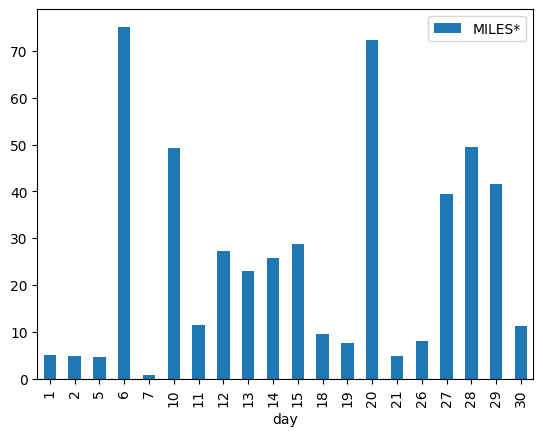

In [25]:
#Plotting the miles and durations of trips for Jan month
Jan_group.plot(kind= 'bar')
plt.show()

In [26]:
Jan_group['MILES*'].sort_values(ascending = False)
#We can say the on 6th Jan the driver has covered the highest value of miles.

day
6     75.1
20    72.4
28    49.4
10    49.3
29    41.6
27    39.5
15    28.8
12    27.2
14    25.8
13    23.0
11    11.6
30    11.4
18     9.5
26     8.1
19     7.6
1      5.1
21     5.0
2      4.8
5      4.7
7      0.8
Name: MILES*, dtype: float64

In [27]:
#Now we creating dataframe the sum of miles covered for each month and plotting it.
miles_day_frame = pd.concat([Jan_group['MILES*'], Feb_group['MILES*'],Mar_group['MILES*'],Apr_group['MILES*'],May_group['MILES*'],Jun_group['MILES*'],Jul_group['MILES*'],Aug_group['MILES*'],Sep_group['MILES*'],Oct_group['MILES*'],
               Nov_group['MILES*'],Dec_group['MILES*']],ignore_index=True, axis=1)
miles_day_frame.columns = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
miles_day_frame.fillna(0,inplace=True)


Jan     500.7
Feb     727.2
Mar    1455.9
Apr    1094.9
May     358.5
Jun     541.0
Jul     488.3
Aug      88.1
Sep       0.0
Oct     496.8
Nov     635.4
Dec     924.4
dtype: float64


<Axes: >

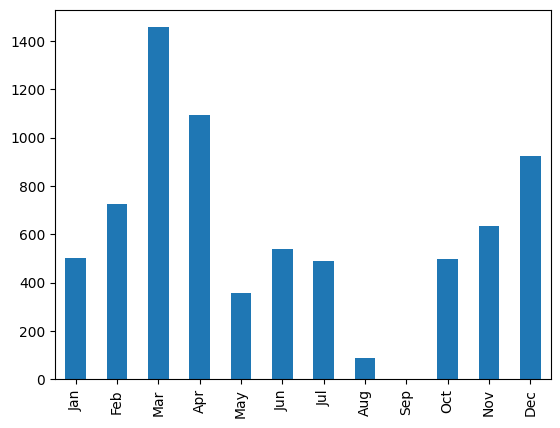

In [28]:
#Sum of miles covered for each month
print(miles_day_frame.sum(axis = 0))
miles_day_frame.sum(axis = 0).plot(kind = 'bar')

#We can say that driver has covered most miles in march month.

<Axes: xlabel='day'>

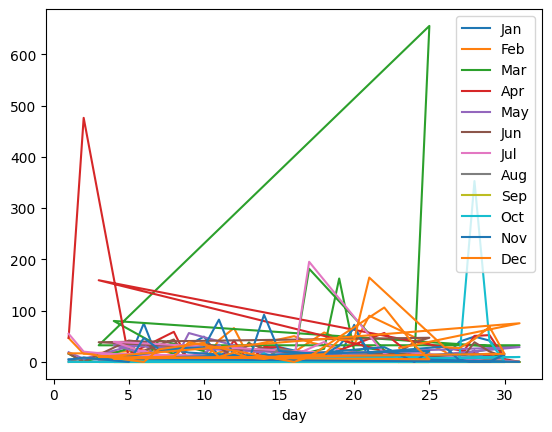

In [29]:
miles_day_frame.plot()   ### do it month wise toptal number of trips.

Text(0.5, 1.0, 'Number of trips per hour')

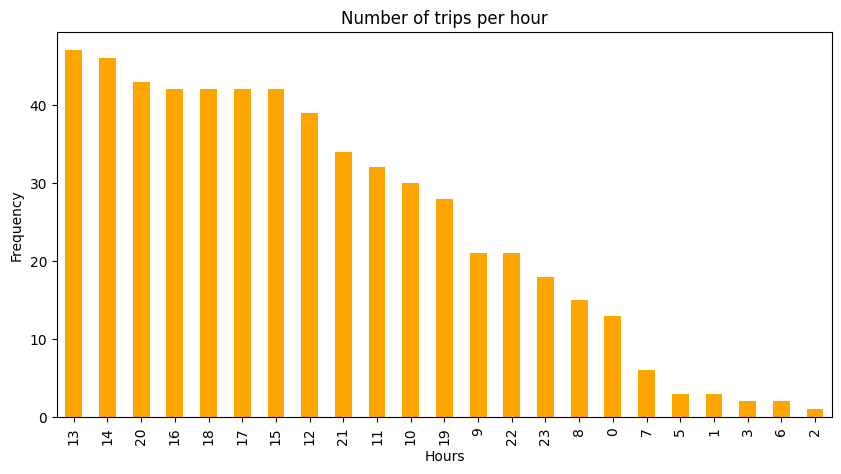

In [30]:
# how many trip made at each clock time and as you see the clock which has the higest number of trips is 1:00 PM
hours = df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

([<matplotlib.axis.XTick at 0x1e6382df650>,
 [Text(1, 0, '<5'),
  Text(2, 0, '5-10'),
  Text(3, 0, '10-20'),
  Text(4, 0, '>35'),
  Text(5, 0, '20-35')])

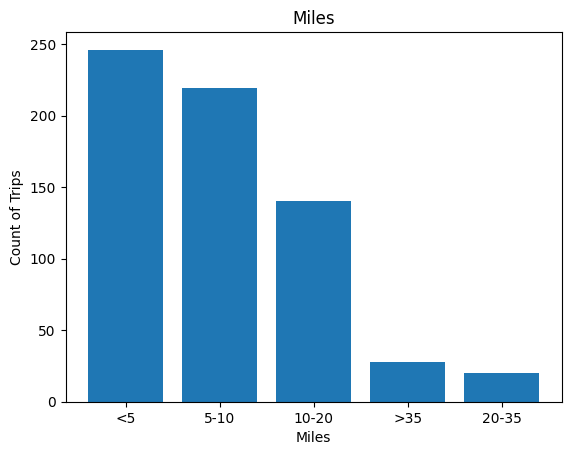

In [31]:
# Miles calculations
# Miles Range (Trying to put the miles covered in different buckets)

range_ = ["<5","5-10","10-20","20-35",">35"]

dict_range = dict()
for x in range_:
    dict_range[x] = 0

for i in uber['MILES*']:
    if i < 5:
        dict_range["<5"] += 1
    elif i < 10:
        dict_range["5-10"] += 1
    elif i < 20:
        dict_range["10-20"] += 1
    elif i < 35:
        dict_range["20-35"] += 1
    else:
        dict_range[">35"] += 1
    
miles = pd.Series(dict_range)
miles.sort_values(inplace=True, ascending=False)
X = plt.bar(range(1,len(miles.index)+1),miles.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Count of Trips")
plt.xticks(range(1,len(miles.index)+1),miles.index)

In [32]:
# calculate trip speed for each trip
df['Duration_hours'] = df['TIMEDELTA'] / 60
df['Speed_KM'] = df['MILES*'] * 1.61 / df['Duration_hours'] # 1 miles = 1.61 KM
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_2060\3999316287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_hours'] = df['TIMEDELTA'] / 60
C:\Users\HP\AppData\Local\Temp\ipykernel_2060\3999316287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Speed_KM'] = df['MILES*'] * 1.61 / df['Duration_hours'] # 1 miles = 1.61 KM


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,TIMEDELTA,Duration_hours,Speed_KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6,0.100000,82.110000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13,0.216667,35.667692
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14,0.233333,32.430000
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67,1.116667,91.842090
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4,0.066667,103.845000


In [33]:
#4. Purpose
uber.info()
uber['PURPOSE*'].unique()


<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

<Axes: >

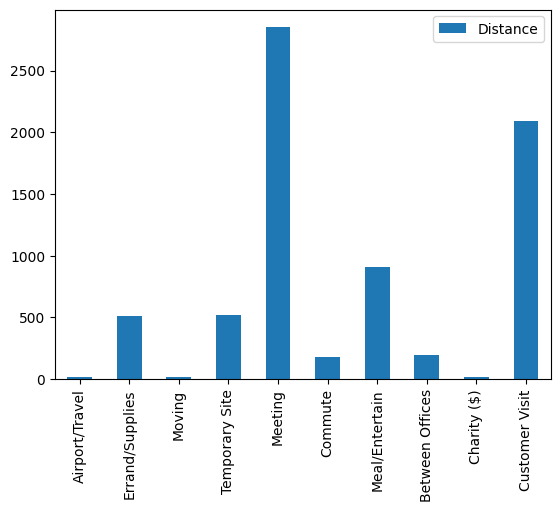

In [34]:
# Proportion of distance spent for each activities
purpose = list(set(uber['PURPOSE*']))
total_dist = []

for i in purpose:
    temp = uber[uber['PURPOSE*'] == i]
    total_dist.append(temp['MILES*'].sum())

df = pd.DataFrame(total_dist, index=purpose, columns=['Distance'])
df.plot(kind='bar')


CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64


<Axes: xlabel='CATEGORY*'>

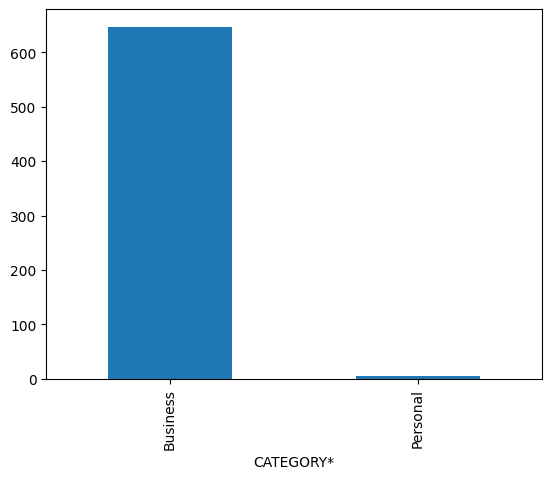

In [35]:
# plot number of trip at each category
x = uber['CATEGORY*'].value_counts()
print(x)
x.plot(kind = 'bar')

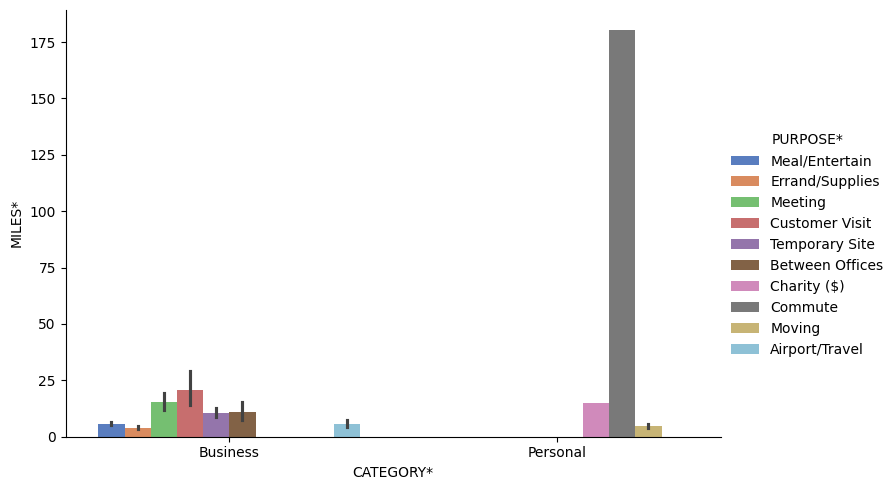

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.catplot(
    x="CATEGORY*",
    y="MILES*",
    hue="PURPOSE*",
    data=uber,
    kind="bar",
    palette="muted",
    height=5,
    aspect=1.5
)

plt.show()
#from the graph is clearly seen that the main contributors for miles are:
#in Business category: meetings and customer visit; private: commute and charity 

In [37]:
df = uber
df.groupby(['CATEGORY*'])['MILES*'].sum() / df['MILES*'].sum()
#97% of Miles was earned by business trips

CATEGORY*
Business    0.970798
Personal    0.029202
Name: MILES*, dtype: float64

In [38]:
df['START_DATE*'] = df['START_DATE*'].apply(lambda x: pd.to_datetime(x))
df['END_DATE*'] = df['END_DATE*'].apply(lambda x: pd.to_datetime(x))
df['DIFF'] = df['END_DATE*'] - df['START_DATE*']
df.groupby(['CATEGORY*', 'PURPOSE*'])['DIFF'].sum()
#the most time spend in the cab for business - meeting/other, personal - commute/other

CATEGORY*  PURPOSE*       
Business   Airport/Travel    0 days 01:18:00
           Between Offices   0 days 07:39:00
           Customer Visit    2 days 08:15:00
           Errand/Supplies   1 days 03:41:00
           Meal/Entertain    1 days 19:00:00
           Meeting           3 days 20:41:00
           Temporary Site    0 days 21:33:00
Personal   Charity ($)       0 days 00:27:00
           Commute           0 days 03:05:00
           Moving            0 days 01:00:00
Name: DIFF, dtype: timedelta64[ns]